[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/erwincarlogonzales/yolo-object-counter-mlflow/blob/main/YOLO_Detection_Counting_MLflow_Experiments_YOLOv8n.ipynb)

# GITHUB SETUP
link: https://github.com/erwincarlogonzales

In [1]:
# Github
from google.colab import userdata

GIT_TOKEN = userdata.get('GITHUB_TOKEN')
GIT_USERNAME = 'erwincarlogonzales'
GIT_REPO = 'yolo-object-counter-mlflow'
CLONE_URL = f"https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPO}.git"

# Clone repo
!git clone '{CLONE_URL}'

Cloning into 'yolo-object-counter-mlflow'...
remote: Enumerating objects: 11901, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11901 (delta 3), reused 7 (delta 2), pack-reused 11893 (from 2)
Receiving objects: 100% (11901/11901), 372.24 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
# Go to current dir in github
%cd {GIT_REPO}

# dir
!ls -la

/content/yolo-object-counter-mlflow
total 24720
drwxr-xr-x 5 root root    4096 Jun  1 15:38 .
drwxr-xr-x 1 root root    4096 Jun  1 15:37 ..
drwxr-xr-x 8 root root    4096 Jun  1 15:38 .git
-rw-r--r-- 1 root root      66 Jun  1 15:38 .gitattributes
-rw-r--r-- 1 root root     100 Jun  1 15:38 .gitignore
-rw-r--r-- 1 root root    1075 Jun  1 15:38 LICENSE
-rw-r--r-- 1 root root      30 Jun  1 15:38 README.md
drwxr-xr-x 2 root root    4096 Jun  1 15:38 .vscode
-rw-r--r-- 1 root root 5613764 Jun  1 15:38 yolo11n.pt
-rw-r--r-- 1 root root 3247394 Jun  1 15:38 YOLO_Detection_Counting_MLflow_Experiments.ipynb
-rw-r--r-- 1 root root 4571938 Jun  1 15:38 YOLO_Detection_Counting_MLflow_Experiments_v0.ipynb
-rw-r--r-- 1 root root 1765791 Jun  1 15:38 YOLO_Detection_Counting_MLflow_Experiments_v1.ipynb
-rw-r--r-- 1 root root 1753307 Jun  1 15:38 YOLO_Detection_Counting_MLflow_Experiments_YOLOv11n.ipynb
-rw-r--r-- 1 root root 1753301 Jun  1 15:38 YOLO_Detection_Counting_MLflow_Experiments_YOLOv8n.i

In [3]:
# Configure Your Git ID
!git config --global user.name "erwincarlogonzales"
!git config --global user.email "erwincarlogonzales@gmail.com"

# GIT COMMIT
- Do not run unless you are going to commit and push

**How to save on GitHub**
1. Go to File > Download.ipynb
2. Go to Folder Icon on the Left and select yolo-object-counter-mlflow folder
3. Click the 3 dots on the right and select Upload
4. Go to where you downloaded the .ipynb and select that
5. This will overwrite the current notebook but you wont see that happen
6. Proceed to !git status to commit and push

In [8]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [9]:
!git add .
!git commit -m 'training yolo8n model'

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [10]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 12 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.20 KiB | 40.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/erwincarlogonzales/yolo-object-counter-mlflow.git
   24e995e..9cc6e04  main -> main


# SETUP & DATASET PREPARATION

In [11]:
# Install Ultralytics & Roboflow
!pip install ultralytics roboflow mlflow onnx onnxruntime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.

In [12]:
# Download Dataset from Roboflow
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("objectdetection-fvcmc").project("hardware-object-detection-xw2gx")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hardware-object-detection-5 in yolov8:: 100%|██████████| 11704/11704 [00:01<00:00, 8221.52it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
# Store the path to data.yaml for training
DATASET_YAML = f"{dataset.location}/data.yaml"

# Check of the data.yaml path
print(f"Dataset YAML path: {DATASET_YAML}")
!cat {DATASET_YAML}

Dataset YAML path: /content/yolo-object-counter-mlflow/hardware-object-detection-5/data.yaml
names:
- black
- defect
- long_screw
- nail
- nut
- rivet
- tek_screw
- washer
nc: 8
roboflow:
  license: CC BY 4.0
  project: hardware-object-detection-xw2gx
  url: https://universe.roboflow.com/objectdetection-fvcmc/hardware-object-detection-xw2gx/dataset/5
  version: 5
  workspace: objectdetection-fvcmc
test: ../test/images
train: ../train/images
val: ../valid/images


# MLFLOW AND MODEL CONFIGURATION

In [14]:
# User defined inputs
import mlflow
import os

MLFLOW_TRACKING_URI = 'https://dagshub.com/erwincarlogonzales/yolo-object-counter-mlflow.mlflow'
EXPERIMENT_NAME = 'yolo8n_training'

# Get credentials and set environment variables
os.environ.update({
    'MLFLOW_TRACKING_URI': MLFLOW_TRACKING_URI,
    'MLFLOW_TRACKING_USERNAME': userdata.get('MLFLOW_TRACKING_USERNAME'),
    'MLFLOW_TRACKING_PASSWORD': userdata.get('MLFLOW_TRACKING_PASSWORD')
})

In [15]:
# Check MLflow connection
mlflow.set_experiment(EXPERIMENT_NAME)
print(f"Successfully connected to MLflow {MLFLOW_TRACKING_URI}")
print(f"Using experiment: {EXPERIMENT_NAME}")

2025/06/01 15:41:55 INFO mlflow.tracking.fluent: Experiment with name 'yolo8n_training' does not exist. Creating a new experiment.


Successfully connected to MLflow https://dagshub.com/erwincarlogonzales/yolo-object-counter-mlflow.mlflow
Using experiment: yolo8n_training


In [16]:
# Determine device for training
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Training on: {device}")

Training on: cuda


In [19]:
# Model Config
from ultralytics import YOLO

CONFIG = {
    'model_variant_source': 'yolov8n.pt',
    'epochs': 50,
    'image_size': 640,
    'batch_size': 16,
    'patience': 3,
    'ultralytics_project_folder': "yolo8_colab_runs",
    'device': device,
    'dataset_yaml_path': DATASET_YAML,
    'ops_set': 13
}

# TRAINING AND MLFLOW EXPORT

In [20]:
from ultralytics.utils import SETTINGS
from onnxruntime.quantization import quantize_dynamic, QuantType

def train_export_log_yolo_bare(config):

    SETTINGS.update({'mlflow': False})

    run_name = f"{config['model_variant_source'].split('.')[0]}_Ep{config['epochs']}_Bs{config['batch_size']}_Img{config['image_size']}"
    local_run_output_dir = None
    model_name_stem = "best" # Using "best" for consistent naming of exported files

    with mlflow.start_run(run_name=run_name) as run:
        original_run_id = run.info.run_id
        print(f"MLflow Run ID started: {original_run_id} (Name: {run_name})")

        mlflow.log_params({
            'model_variant': config['model_variant_source'],
            'epochs': config['epochs'],
            'image_size': config['image_size'],
            'batch_size': config['batch_size'],
            'patience': config['patience'],
            'dataset_yaml': os.path.basename(config['dataset_yaml_path']),
            'device_used': config['device']
        })

        model = YOLO(config['model_variant_source'])
        model.to(config['device'])

        print(f"\nStarting YOLOv8 training for {config['epochs']} epochs...")
        results = model.train(
            data=config['dataset_yaml_path'],
            epochs=config['epochs'],
            imgsz=config['image_size'],
            batch=config['batch_size'],
            patience=config['patience'],
            project=config['ultralytics_project_folder'],
            name=original_run_id,
            device=config['device'],
            exist_ok=True
        )
        print("Training complete.")

        # Get local output dir
        run_output_dir = results.save_dir
        local_run_output_dir = run_output_dir
        print(f"YOLO outputs saved locally to: {run_output_dir}")

        # Log metrics on MLflow
        print("\nLogging metrics to MLflow...")
        mlflow.log_metric("mAP_0.5_0.95", results.box.map)
        mlflow.log_metric("mAP_0.5", results.box.map50)
        mlflow.log_metric("Precision", results.box.mp)
        mlflow.log_metric("Recall", results.box.mr)
        print(f"  Metrics logged (mAP@0.5-0.95: {results.box.map:.4f})")

        artifacts_to_log = ["results.csv",
                            "confusion_matrix.png",
                            "PR_curve.png",
                            "F1_curve.png",
                            "P_curve.png",
                            "R_curve.png",
                            "labels.jpg",
                            "labels_correlogram.jpg",
                            "val_batch0_labels.jpg",
                            "val_batch0_pred.jpg",
                            "results.png"
                            ]

        print("Logging training artifacts to MLflow under 'training_artifacts'...")
        for artifact_name in artifacts_to_log:
            artifact_path = os.path.join(run_output_dir, artifact_name)
            if os.path.exists(artifact_path):
                 mlflow.log_artifact(artifact_path, artifact_path="training_artifacts")
            else:
                 print(f"  Skipping non-critical training artifact (not found): {artifact_name}")

        print("\nStarting model export and logging to MLflow...")
        best_model_path_pt = os.path.join(run_output_dir, 'weights/best.pt')

        print(f"Logging PyTorch model: {best_model_path_pt}")
        mlflow.log_artifact(best_model_path_pt, artifact_path="models/pytorch")
        print(f"  Logged PyTorch model: {model_name_stem}.pt")

        export_model = YOLO(best_model_path_pt)

        # 1. ONNX FP32 Export & Log
        print("\nExporting and logging ONNX FP32...")
        fp32_onnx_path = export_model.export(
            format='onnx',
            imgsz=config['image_size'],
            simplify=True,
            device=config['device']
        )
        mlflow.log_artifact(fp32_onnx_path, artifact_path="models/onnx_fp32")
        print(f"  Logged ONNX FP32: {os.path.basename(fp32_onnx_path)}")

        # 2. ONNX INT8 Dynamic Quantization & Log
        print("\nPerforming ONNX INT8 Dynamic Quantization...")
        quantized_model_dir = os.path.dirname(fp32_onnx_path)
        output_onnx_int8_dynamic_filename = f"{model_name_stem}_int8_dynamic.onnx"
        output_onnx_int8_dynamic_path = os.path.join(quantized_model_dir, output_onnx_int8_dynamic_filename)

        quantize_dynamic(
            model_input=fp32_onnx_path,
            model_output=output_onnx_int8_dynamic_path,
            weight_type=QuantType.QUInt8
        )
        print(f"  Dynamically quantized ONNX model (INT8) saved to: {output_onnx_int8_dynamic_path}")

        mlflow.log_artifact(output_onnx_int8_dynamic_path, artifact_path="models/onnx_int8_dynamic")
        print(f"  Logged ONNX INT8 Dynamic: {os.path.basename(output_onnx_int8_dynamic_path)}")

        # 3. ONNX FP16 Export & Log
        print("\nExporting and logging ONNX FP16...")
        fp16_onnx_path = export_model.export(
            format='onnx',
            imgsz=config['image_size'],
            half=True,
            simplify=True,
            device=config['device']
        )
        mlflow.log_artifact(fp16_onnx_path, artifact_path="models/onnx_fp16")
        print(f"  Logged ONNX FP16: {os.path.basename(fp16_onnx_path)}")

        # 4. TensorRT FP16
        print("\nExporting and logging TensorRT FP16 Engine...")
        fp16_engine_path = export_model.export(
            format='engine',
            imgsz=config['image_size'],
            half=True,
            device=config['device']
        )
        mlflow.log_artifact(fp16_engine_path, artifact_path="models/tensorrt_fp16")
        print(f"  Logged TensorRT FP16: {os.path.basename(fp16_engine_path)}")

        # 5. TensorRT INT8 -> Your session crashed. Automatically restarting when converting
        print("\nExporting and logging TensorRT INT8 Engine...")
        int8_engine_path = export_model.export(
            format='engine',
            imgsz=config['image_size'],
            int8=True,
            data=config['dataset_yaml_path'],
            device=config['device'],
            batch=config['batch_size']
        )
        mlflow.log_artifact(int8_engine_path, artifact_path="models/tensorrt_int8")
        print(f"  Logged TensorRT INT8: {os.path.basename(int8_engine_path)}")

        print("\nMLflow Run operations complete.")

    return local_run_output_dir

# Run training and return output dir
output_directory = train_export_log_yolo_bare(CONFIG)
if output_directory:
    print(f"\nTraining run local output directory: {output_directory}")

MLflow Run ID started: d60c7b018ce64ccb85bedcfb478c70fb (Name: yolov8n_Ep50_Bs16_Img640)

Starting YOLOv8 training for 50 epochs...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo-object-counter-mlflow/hardware-object-detection-5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, mul

100%|██████████| 755k/755k [00:00<00:00, 85.9MB/s]

Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,408 parameters, 3,012,392 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1053.5±509.7 MB/s, size: 46.5 KB)


train: Scanning /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/labels... 4940 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4940/4940 [00:03<00:00, 1438.28it/s]

train: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/images/nail031_jpg.rf.e344bbaebaf683c1cc4877c23b7ddcf6.jpg: 2 duplicate labels removed
train: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/images/rivet_frame795_jpg.rf.32771238e43d9e5e96d888332e0c7299.jpg: 1 duplicate labels removed


train: New cache created: /content/yolo-object-counter-mlflow/hardware-object-detection-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 608.7±284.9 MB/s, size: 25.4 KB)


val: Scanning /content/yolo-object-counter-mlflow/hardware-object-detection-5/valid/labels... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<00:00, 1088.42it/s]

val: New cache created: /content/yolo-object-counter-mlflow/hardware-object-detection-5/valid/labels.cache


Plotting labels to yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.45G      1.586      2.455      1.325        218        640: 100%|██████████| 309/309 [00:35<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]

                   all        604       5396      0.734      0.811      0.818      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.91G      1.346      1.472      1.219        318        640: 100%|██████████| 309/309 [00:32<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.93it/s]


                   all        604       5396       0.83       0.89       0.92      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.21G      1.268      1.273      1.182        330        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]


                   all        604       5396      0.841      0.898      0.928      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.23G      1.225      1.165      1.161        341        640: 100%|██████████| 309/309 [00:31<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.35it/s]


                   all        604       5396      0.878      0.916      0.931      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.25G       1.17      1.068      1.141        210        640: 100%|██████████| 309/309 [00:31<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.29it/s]


                   all        604       5396      0.893      0.933      0.953      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.26G      1.142      1.001      1.129        294        640: 100%|██████████| 309/309 [00:31<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        604       5396      0.903      0.929      0.949      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.28G      1.119     0.9521      1.116        296        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]

                   all        604       5396      0.922      0.951      0.959      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.29G      1.096      0.919      1.106        250        640: 100%|██████████| 309/309 [00:31<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.935      0.959       0.97       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.31G      1.077     0.8882      1.097        266        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.50it/s]

                   all        604       5396      0.942      0.961      0.972      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.33G      1.052     0.8543      1.086        293        640: 100%|██████████| 309/309 [00:31<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.42it/s]

                   all        604       5396      0.941      0.974      0.974      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.35G      1.046      0.838      1.085        207        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.48it/s]

                   all        604       5396      0.939      0.974      0.974      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.36G      1.034     0.8184       1.08        269        640: 100%|██████████| 309/309 [00:31<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]

                   all        604       5396      0.943      0.972      0.975      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.38G      1.021     0.7916      1.072        267        640: 100%|██████████| 309/309 [00:31<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.52it/s]

                   all        604       5396      0.949      0.978      0.978      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.4G      1.004      0.773      1.064        244        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.47it/s]

                   all        604       5396       0.95      0.977      0.982      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.41G     0.9868     0.7544      1.057        146        640: 100%|██████████| 309/309 [00:31<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        604       5396      0.958      0.978      0.982      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.43G     0.9868     0.7502      1.054        228        640: 100%|██████████| 309/309 [00:31<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.45it/s]

                   all        604       5396      0.955      0.986      0.979      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.45G     0.9801     0.7369      1.054        229        640: 100%|██████████| 309/309 [00:31<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.47it/s]

                   all        604       5396      0.947      0.979      0.983      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.46G     0.9664     0.7224      1.047        321        640: 100%|██████████| 309/309 [00:31<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.40it/s]

                   all        604       5396      0.963      0.985      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.48G     0.9569     0.7125      1.043        332        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.36it/s]

                   all        604       5396      0.956      0.982      0.981      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.5G     0.9501      0.707       1.04        242        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        604       5396      0.963      0.984      0.983      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.51G      0.935      0.691      1.033        248        640: 100%|██████████| 309/309 [00:31<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.57it/s]

                   all        604       5396       0.96      0.979      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.53G      0.933     0.6894      1.034        350        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        604       5396      0.959      0.978      0.984      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.55G      0.929     0.6785       1.03        303        640: 100%|██████████| 309/309 [00:31<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.50it/s]

                   all        604       5396      0.966      0.981      0.985      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.86G     0.9237     0.6682       1.03        214        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.52it/s]

                   all        604       5396      0.967      0.989      0.984      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.88G     0.9082     0.6589      1.023        284        640: 100%|██████████| 309/309 [00:31<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]

                   all        604       5396      0.968      0.988      0.986      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.9G     0.9103     0.6548      1.024        368        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        604       5396      0.968      0.987      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.92G     0.8991     0.6461      1.018        278        640: 100%|██████████| 309/309 [00:31<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.45it/s]

                   all        604       5396       0.97      0.987      0.986      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.93G     0.8934     0.6378      1.016        322        640: 100%|██████████| 309/309 [00:31<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.45it/s]

                   all        604       5396      0.969      0.991      0.986      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.95G     0.8859     0.6316       1.01        328        640: 100%|██████████| 309/309 [00:31<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.53it/s]

                   all        604       5396      0.971       0.99      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.97G     0.8743     0.6201      1.007        313        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]

                   all        604       5396      0.973      0.991      0.988      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.31G     0.8727     0.6196      1.005        251        640: 100%|██████████| 309/309 [00:31<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.45it/s]

                   all        604       5396      0.973      0.989      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.33G     0.8677     0.6198      1.005        312        640: 100%|██████████| 309/309 [00:31<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.34it/s]

                   all        604       5396      0.974      0.991      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.35G     0.8644     0.6089      1.002        336        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.43it/s]

                   all        604       5396      0.971      0.992      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.37G     0.8502     0.5964     0.9979        232        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.39it/s]

                   all        604       5396      0.973      0.986      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.38G      0.848     0.5958     0.9948        295        640: 100%|██████████| 309/309 [00:31<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        604       5396      0.972      0.991      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.4G     0.8537     0.5976     0.9986        299        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        604       5396      0.974      0.992      0.988      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.41G     0.8424      0.588     0.9935        331        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.42it/s]

                   all        604       5396      0.973      0.994      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.43G     0.8351     0.5828     0.9893        354        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]

                   all        604       5396      0.975      0.992      0.988      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.45G     0.8312     0.5799     0.9887        331        640: 100%|██████████| 309/309 [00:31<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.50it/s]

                   all        604       5396      0.974      0.992      0.987      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.47G     0.8257     0.5735     0.9852        299        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.45it/s]

                   all        604       5396      0.973      0.991      0.988      0.864


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.48G     0.7695     0.4994     0.9607        103        640: 100%|██████████| 309/309 [00:31<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]

                   all        604       5396      0.975      0.992      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.5G      0.755     0.4901      0.956        133        640: 100%|██████████| 309/309 [00:30<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]

                   all        604       5396      0.977      0.994      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.52G     0.7503     0.4827     0.9535        169        640: 100%|██████████| 309/309 [00:30<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.41it/s]

                   all        604       5396      0.975      0.994      0.988      0.861
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



43 epochs completed in 0.418 hours.
Optimizer stripped from yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/last.pt, 6.3MB
Optimizer stripped from yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.pt, 6.3MB

Validating yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.12it/s]


                   all        604       5396      0.973      0.991      0.988      0.864
                 black        265       1249      0.995      0.998      0.992      0.841
                defect        512       1517      0.962      0.981      0.991       0.89
            long_screw        211        638      0.968      0.986      0.988      0.839
                  nail         43        387      0.994          1      0.995      0.884
                   nut         40        400       0.97      0.993      0.989      0.865
                 rivet        139        358      0.943      0.975      0.969      0.819
             tek_screw        167        711      0.988          1      0.994      0.855
                washer         14        136      0.964          1      0.986      0.921
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb
Training complete.
YOLO outputs saved locally to: 

  Logged ONNX FP32: best.onnx

Performing ONNX INT8 Dynamic Quantization...
  Dynamically quantized ONNX model (INT8) saved to: yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best_int8_dynamic.onnx
  Logged ONNX INT8 Dynamic: best_int8_dynamic.onnx

Exporting and logging ONNX FP16...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (6.0 MB)

ONNX: starting export with onnx 1.18.0 opset 19...
ONNX: slimming with onnxslim 0.1.55...
ONNX: export success ✅ 1.0s, saved as 'yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.onnx' (5.9 MB)

Export complete (1.2s)
Results saved to /content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights
Predict:         yolo p

Scanning /content/yolo-object-counter-mlflow/hardware-object-detection-5/valid/labels.cache... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<?, ?it/s]


TensorRT: input "images" with shape(-1, 3, -1, -1) DataType.FLOAT
TensorRT: output "output0" with shape(-1, 12, -1) DataType.FLOAT
TensorRT: building INT8 engine as yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine
TensorRT: export success ✅ 275.8s, saved as 'yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine' (8.5 MB)

Export complete (276.2s)
Results saved to /content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights
Predict:         yolo predict task=detect model=yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine imgsz=640 int8 
Validate:        yolo val task=detect model=yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine imgsz=640 data=/content/yolo-object-counter-mlflow/hardware-object-detection-5/data.yaml int8 
Visualize:       https://netron.app
  Logged TensorRT INT8: best.engine

MLflow Run operations complete.
🏃 View run yolov8n_Ep50_Bs16_Img640 at: https://dagshub

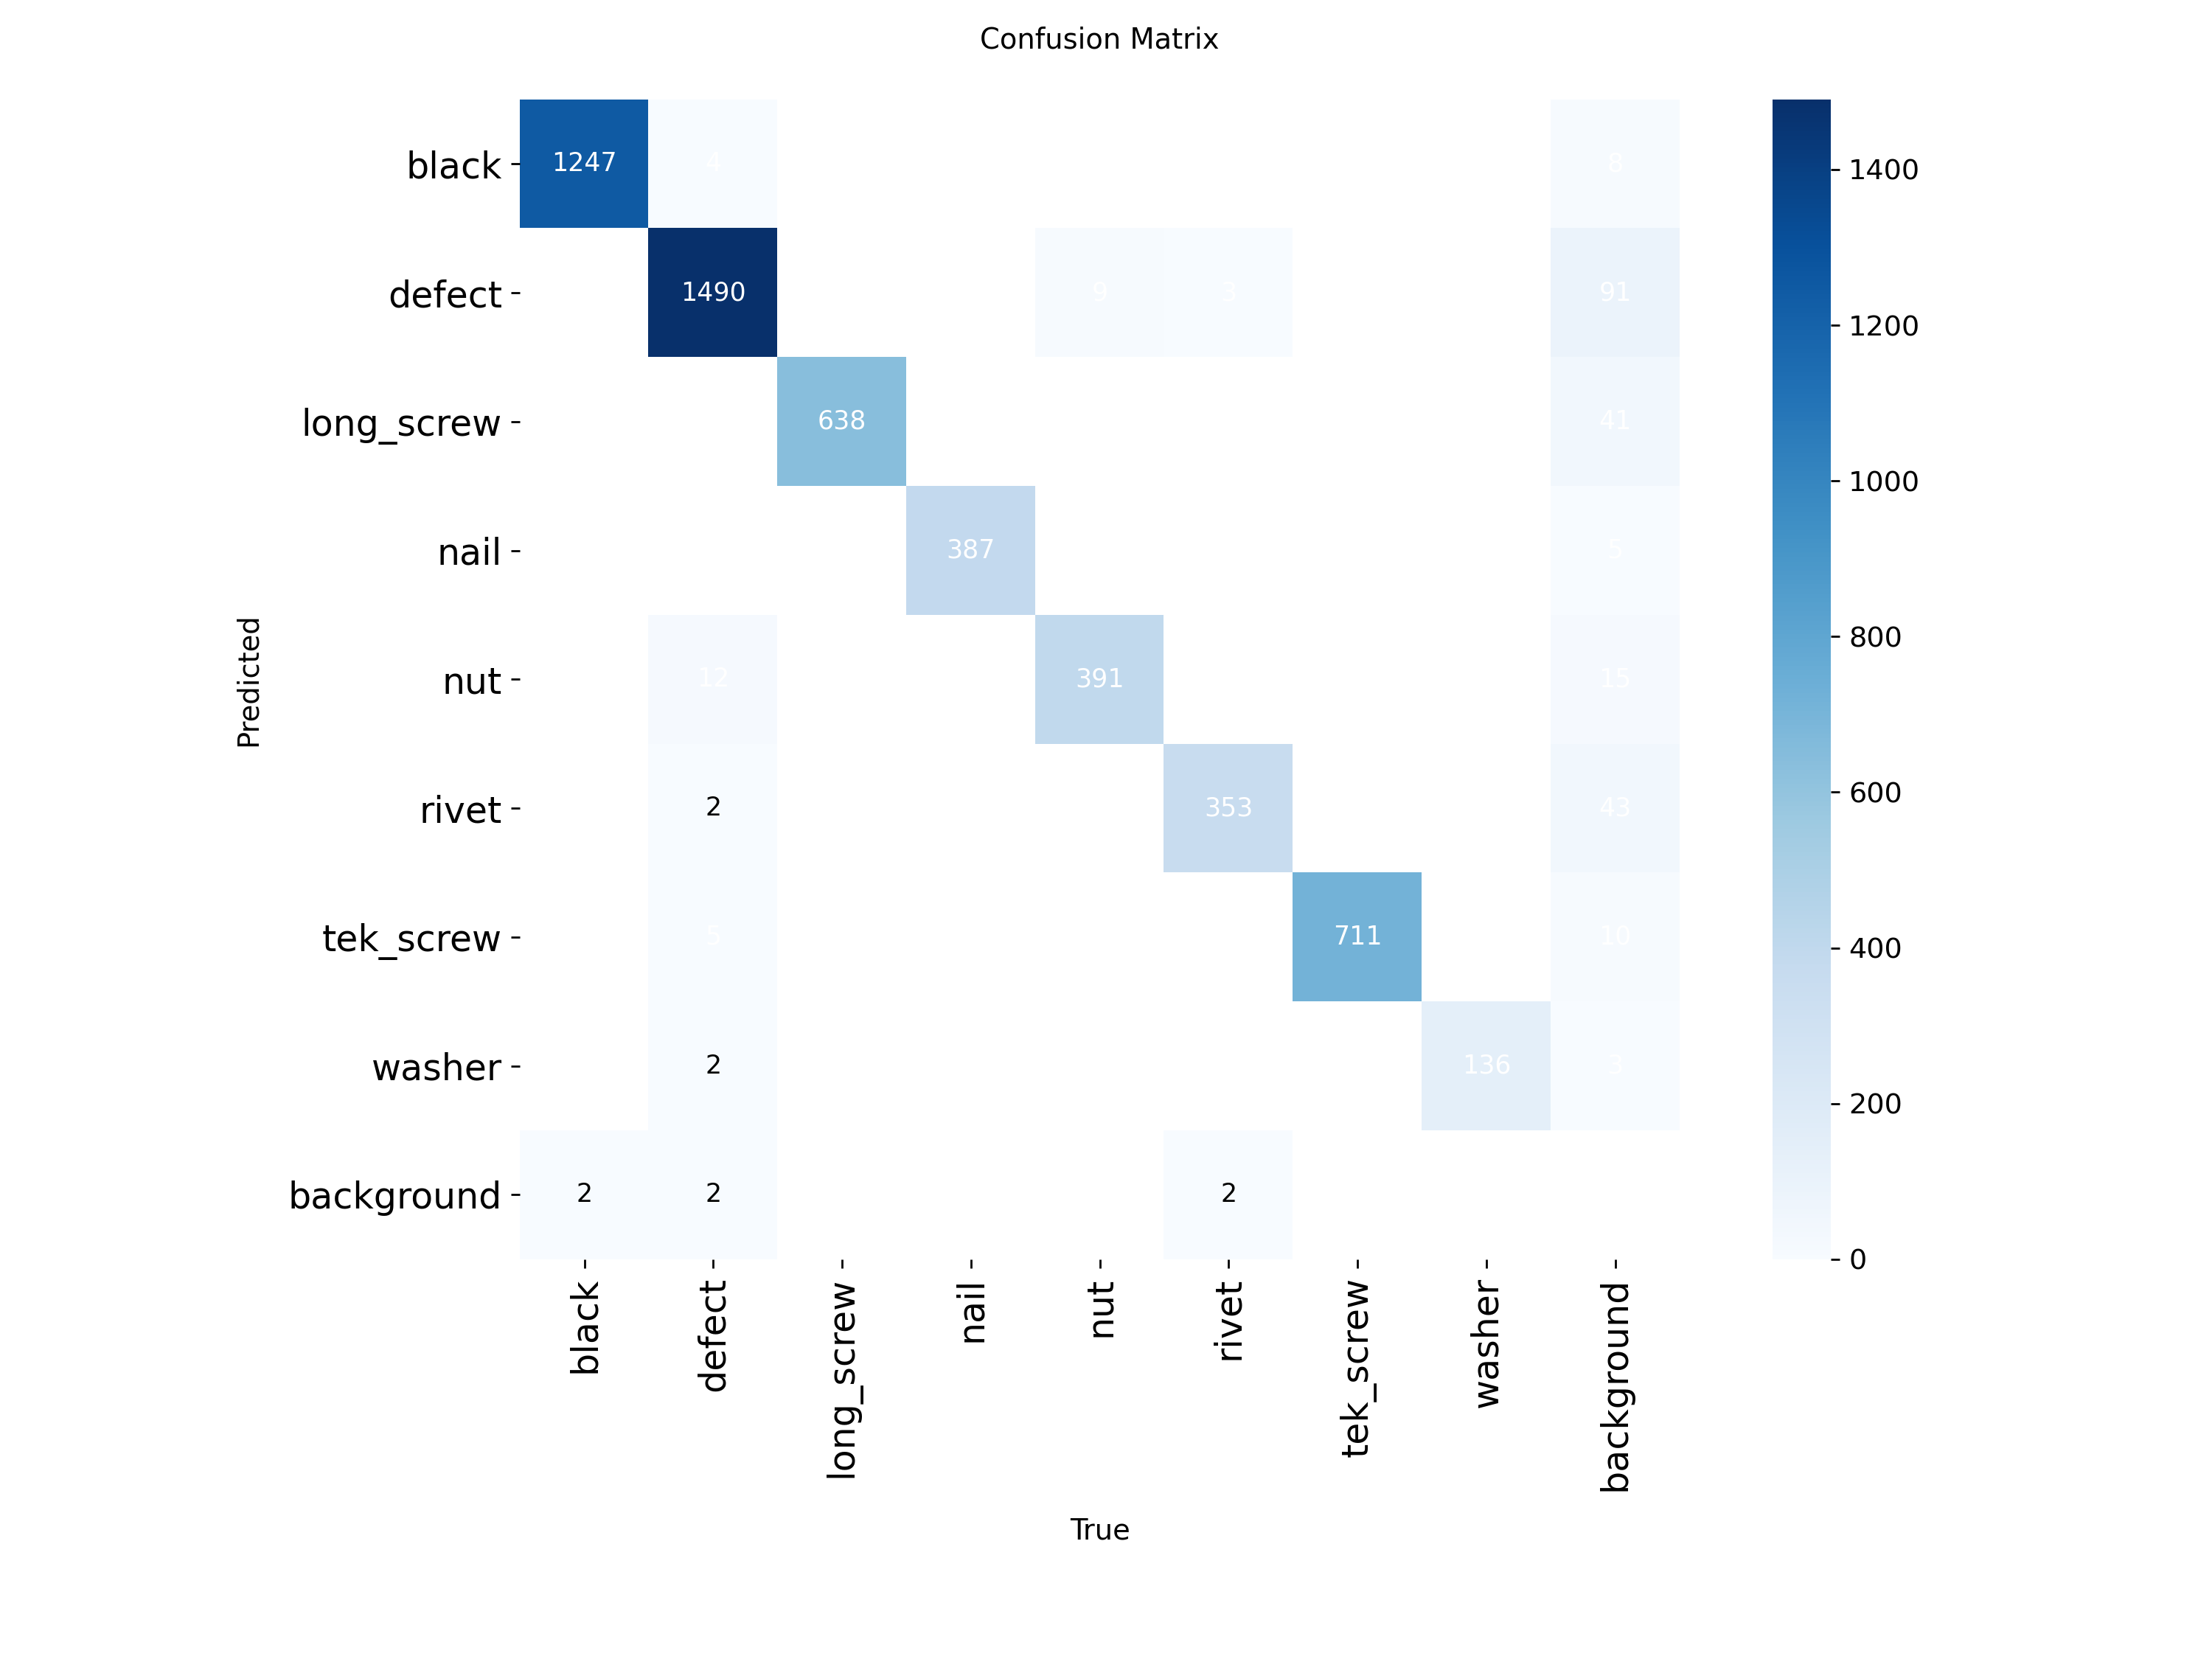

In [21]:
from IPython.display import Image, display

# Display confusion
confusion_matrix_path = os.path.join(output_directory, 'confusion_matrix.png')
display(Image(filename=confusion_matrix_path, width=600))

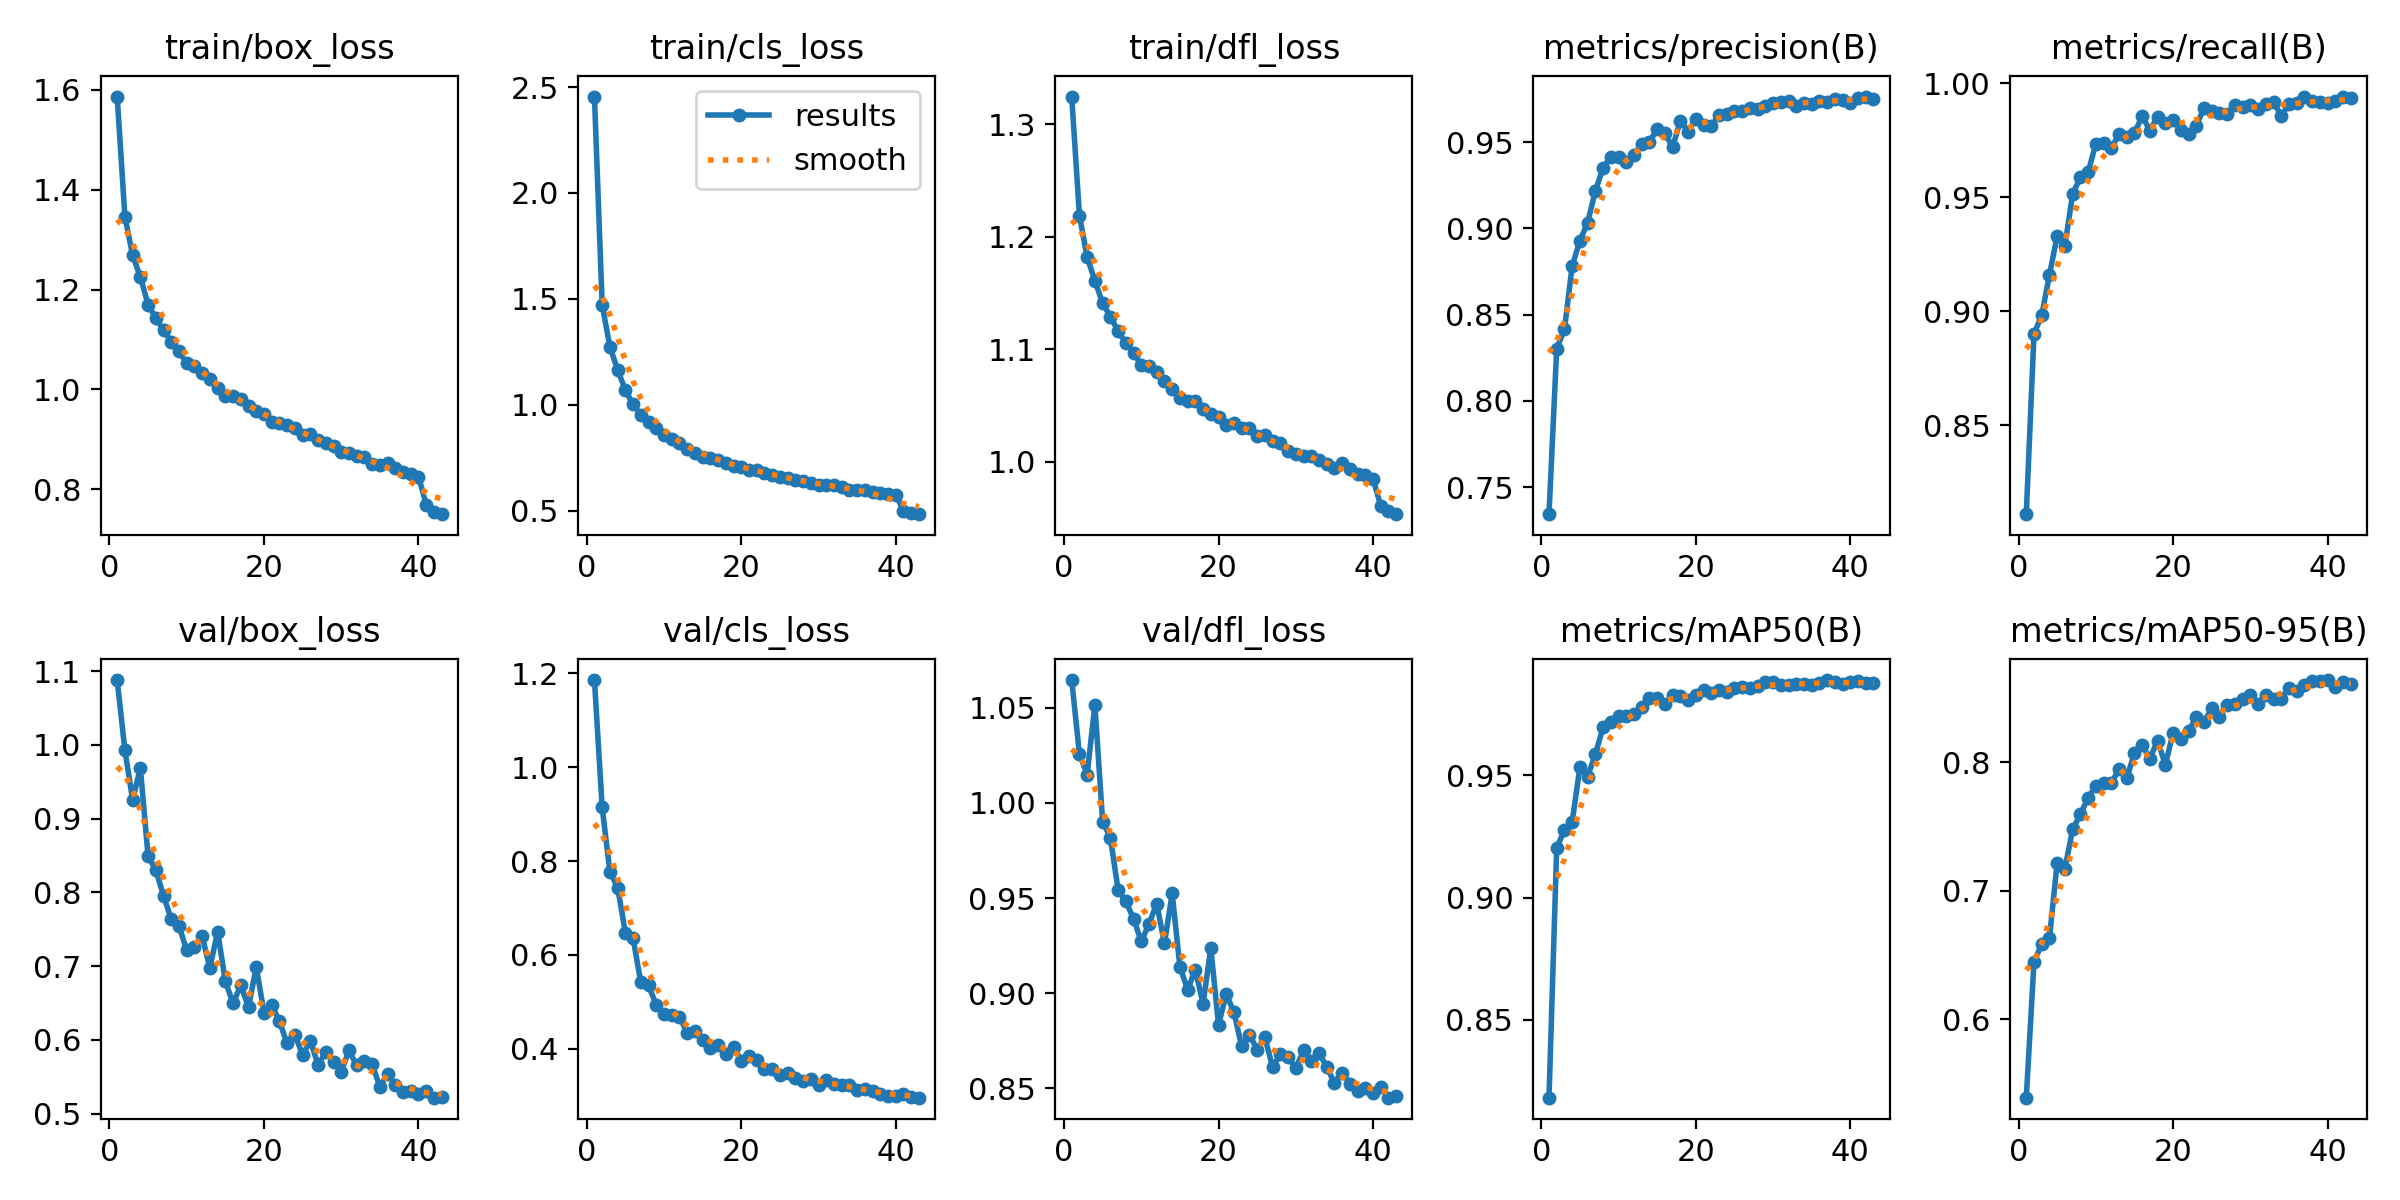

In [22]:
from IPython.display import Image, display

# Display training results
results_path = os.path.join(output_directory, 'results.png')
display(Image(filename=results_path, width=600))

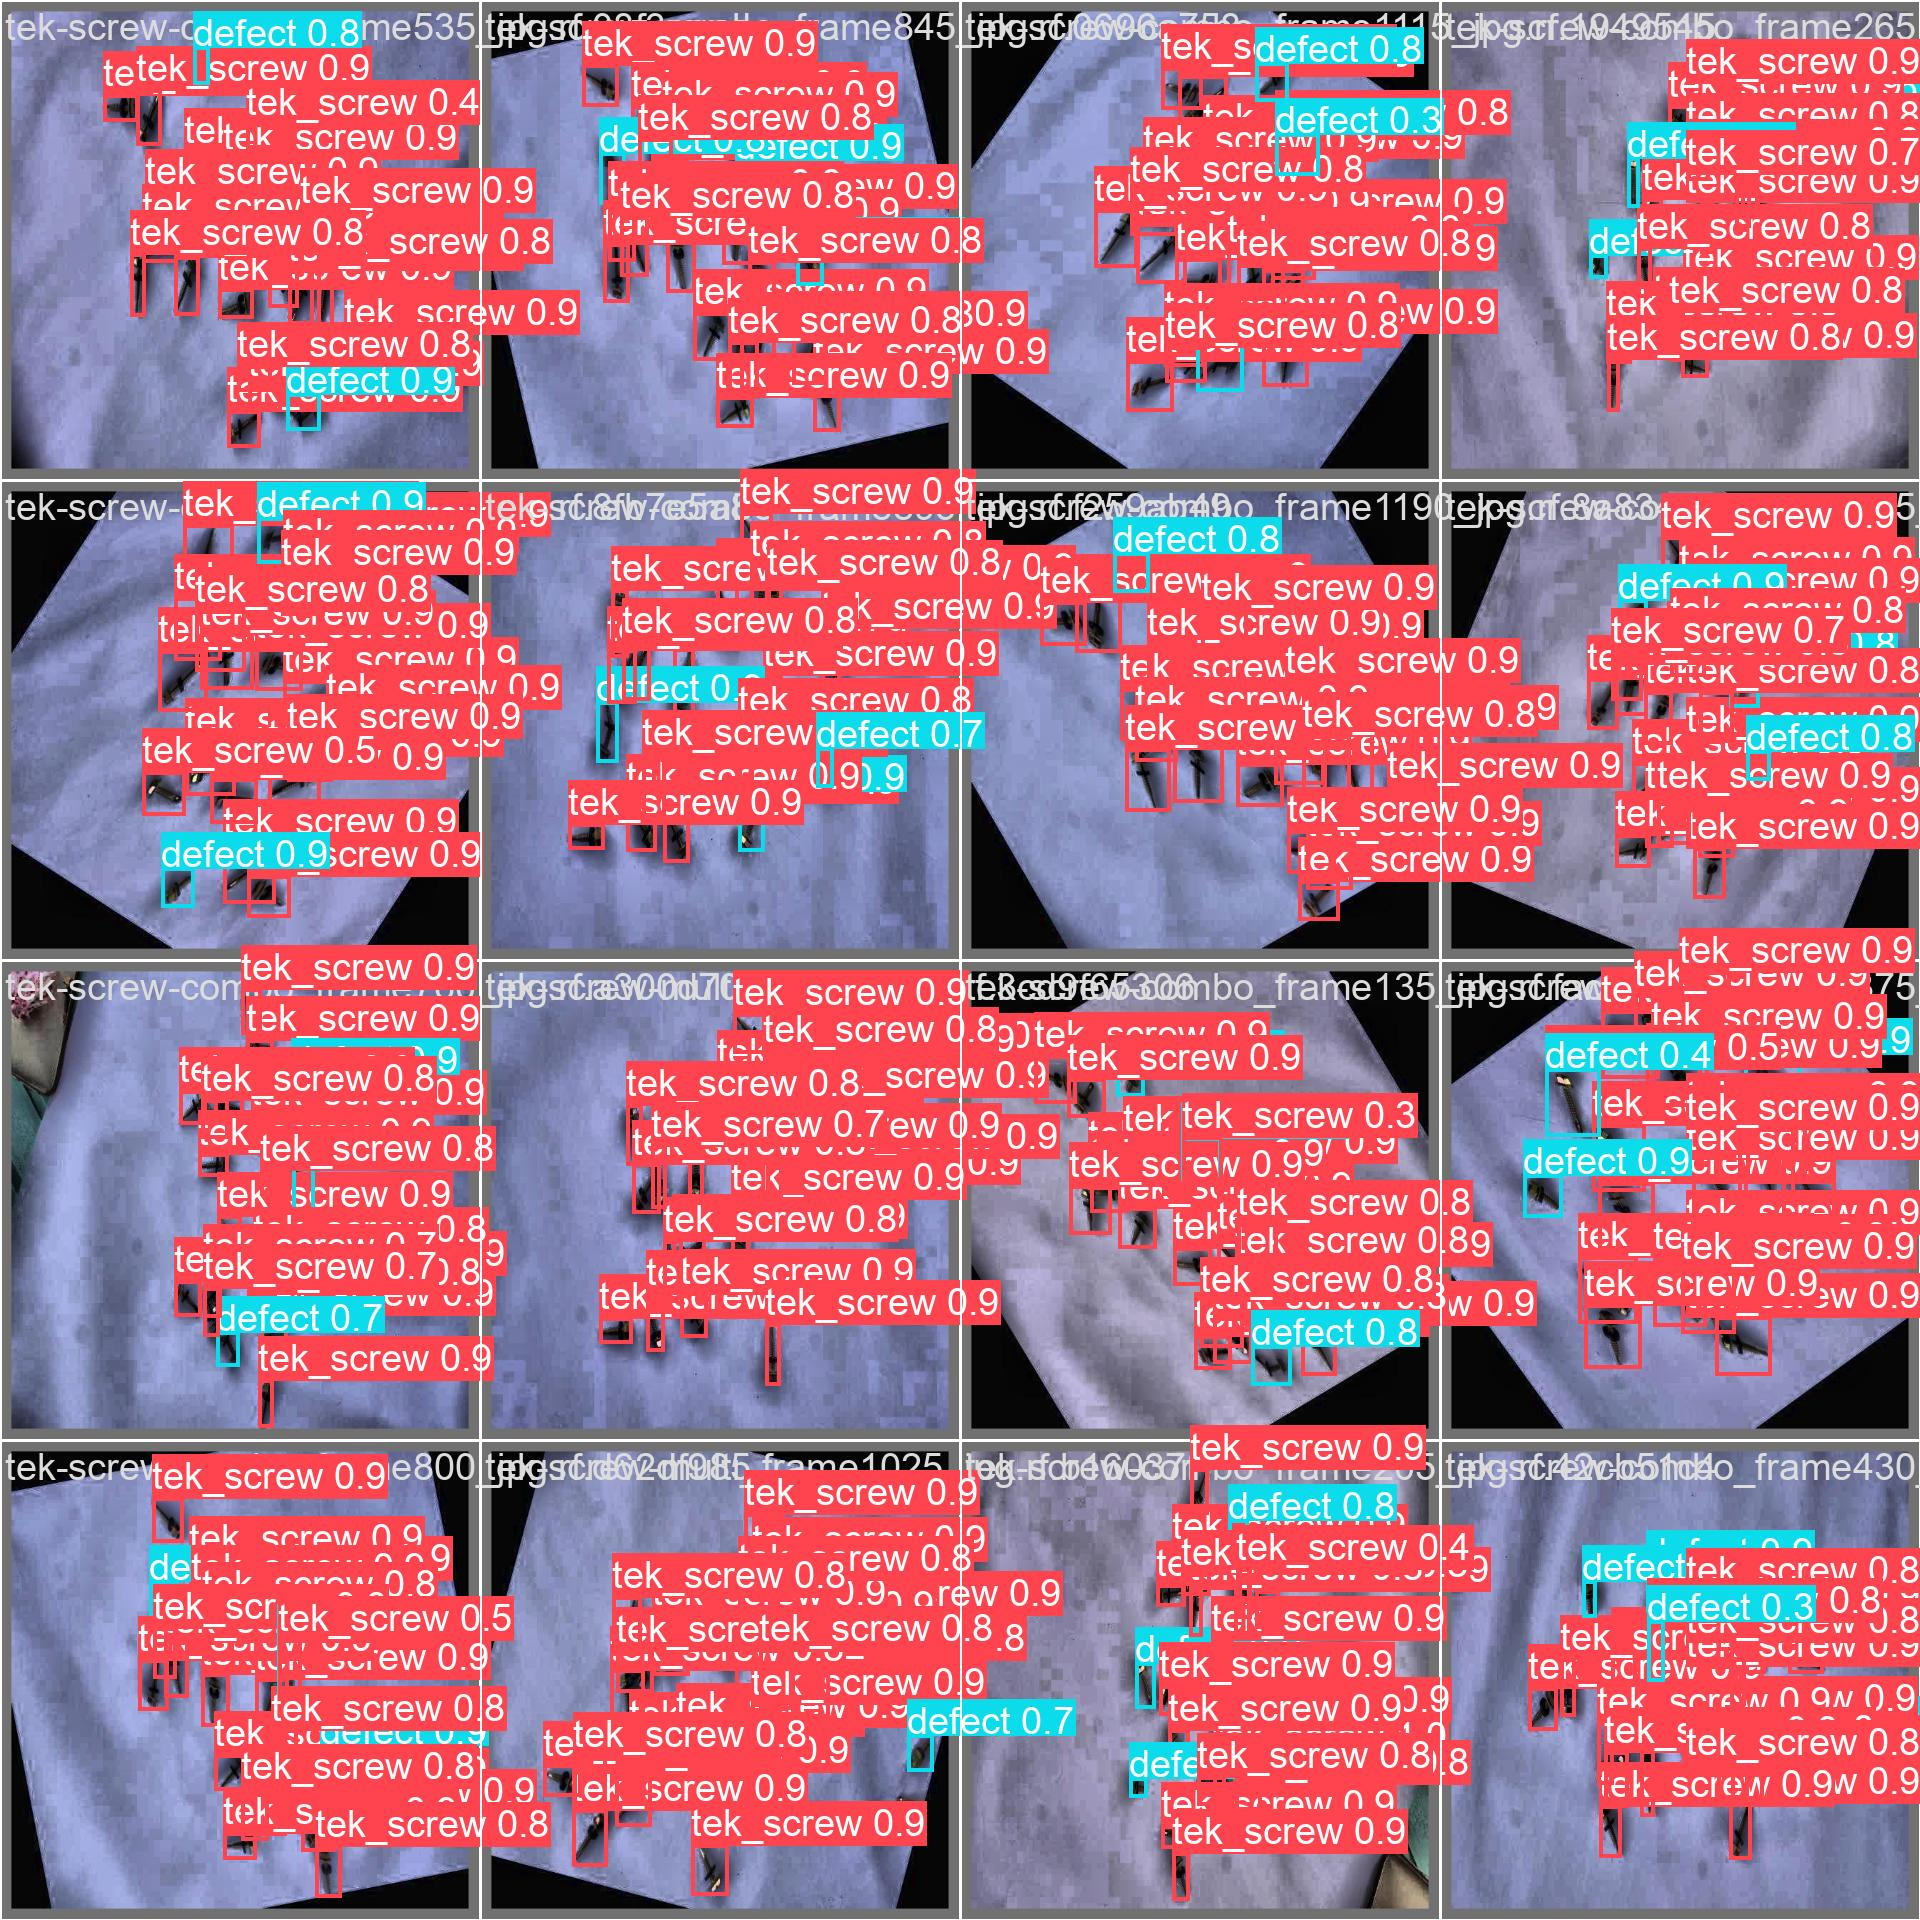

In [23]:
from IPython.display import Image, display

# Diplay validation
validation_image_file = os.path.join(output_directory, 'val_batch0_pred.jpg')
display(Image(filename=validation_image_file, width=600))

# TESTING MODELS

### TensorRT

In [24]:
# Load the exported TensorRT INT8 model
engine_model = YOLO("/content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine", task="detect")

# Run inference
result = engine_model.predict("/content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/black-combo_frame1055_jpg.rf.b8b6f7202f139d3cf5a0c738d1a822e8.jpg")

Loading /content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best.engine for TensorRT inference...

image 1/1 /content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/black-combo_frame1055_jpg.rf.b8b6f7202f139d3cf5a0c738d1a822e8.jpg: 640x640 21 blacks, 3 defects, 1.7ms
Speed: 2.9ms preprocess, 1.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


### ONNX

In [25]:
# Load the exported ONNX INT8 dynamic model
onnx_model  = YOLO("/content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best_int8_dynamic.onnx", task="detect")

# Run inference
result = onnx_model.predict("/content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/tek-screw-combo_frame950_jpg.rf.ceb2f9cbf9aec4250b968337717caf69.jpg")

Loading /content/yolo-object-counter-mlflow/yolo8_colab_runs/d60c7b018ce64ccb85bedcfb478c70fb/weights/best_int8_dynamic.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime with CUDA. Using CPU...
Using ONNX Runtime CPUExecutionProvider

image 1/1 /content/yolo-object-counter-mlflow/hardware-object-detection-5/test/images/tek-screw-combo_frame950_jpg.rf.ceb2f9cbf9aec4250b968337717caf69.jpg: 640x640 3 defects, 18 tek_screws, 69.4ms
Speed: 3.3ms preprocess, 69.4ms inference, 32.9ms postprocess per image at shape (1, 3, 640, 640)


# REGISTER MODEL

In [26]:
from mlflow.tracking import MlflowClient

# Model registry
def register_model(run_id, model_name):
    model_uri = f'runs:/{run_id}/model'

    return mlflow.register_model(model_uri=model_uri, name=model_name)

# Promote model
def promote_challenger_to_production(model_name, prod_name):
    client = MlflowClient()
    current_model_uri = f"models:/{model_name}@challenger"
    client.copy_model_version(src_model_uri=current_model_uri, dst_name=prod_name)

In [28]:
run_id = 'd60c7b018ce64ccb85bedcfb478c70fb' # Get this from MLflow UI
model_name = 'best_int8_dynamic.onnx'
prod_name = 'yolo8n_android_production'

# Register model
model_details = register_model(run_id, model_name)
print(f'Registered model version: {model_details.version}')

Registered model 'best_int8_dynamic.onnx' already exists. Creating a new version of this model...
2025/06/01 16:23:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_int8_dynamic.onnx, version 2


Registered model version: 2


Created version '2' of model 'best_int8_dynamic.onnx'.


In [29]:
# Promote challenger to production => make sure to add challenger to the model alias
promote_challenger_to_production(model_name, prod_name)

Successfully registered model 'yolo8n_android_production'.
Copied version '2' of model 'best_int8_dynamic.onnx' to version '1' of model 'yolo8n_android_production'.
